## EXTERNAL DATA PREPROCESSING

In this notebook, other external data will be preprocessed and visualized.

In [25]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load every data

In [26]:
pandemic = pd.read_csv('American corona.csv')
print(pandemic)

          Date     New       All      Cure   Death
0    2020.1.28       0         5         0       0
1    2020.1.29       0         5         0       0
2    2020.1.30       1         6         0       0
3    2020.1.31       0         6         0       0
4    2020.2.01       1         7         0       0
..         ...     ...       ...       ...     ...
350  2021.1.12  222121  23143197  13680461  385249
351  2021.1.13  236462  23368225  13816028  389599
352  2021.1.14  230457  23616345  13975036  393928
353  2021.1.15  248080  23848410  14112119  397994
354  2021.1.16  248080  24102429  14228969  401856

[355 rows x 5 columns]


In [27]:
rpm = pd.read_csv('Revenue Passenger Miles.csv')
print(rpm)

    Season  RPM(bn)
0   2017S1    50.98
1   2017S2    59.56
2   2017S3    60.47
3   2017S4    55.33
4   2018S1    52.95
5   2018S2    60.78
6   2018S3    61.69
7   2018S4    55.57
8   2019S1    54.80
9   2019S2    62.66
10  2019S3    64.87
11  2019S4    58.92
12  2020S1    45.17
13  2020S2     7.23
14  2020S3    18.12


In [28]:
oil = pd.read_csv('WTIOil.csv')
print(oil)

            Date  Close   Open   High    Low   Volume Up/Down
0     2020-12-31  48.52  48.35  48.58  47.77  181.89K   0.25%
1     2020-12-30  48.40  48.13  48.66  47.61  266.96K   0.83%
2     2020-12-29  48.00  47.72  48.35  47.68  213.78K   0.80%
3     2020-12-28  47.62  48.23  48.96  47.50  238.46K  -1.26%
4     2020-12-24  48.23  48.09  48.62  47.56  167.39K   0.23%
...          ...    ...    ...    ...    ...      ...     ...
1050  2017-01-06  53.99  53.73  54.32  53.32  528.33K   0.43%
1051  2017-01-05  53.76  53.39  54.12  52.79  517.36K   0.94%
1052  2017-01-04  53.26  52.49  53.43  52.15  512.64K   1.78%
1053  2017-01-03  52.33  54.20  55.24  52.11  727.79K  -3.15%
1054  2017-01-02  54.03  54.09  54.18  54.01        -   0.58%

[1055 rows x 7 columns]


Let's deal with the pandemic data, still with the type check first

In [29]:
pandemic.dtypes

Date     object
New       int64
All       int64
Cure      int64
Death     int64
dtype: object

Likewise, Date should be in datetime type

In [30]:
#Change into type datetime in the format yyyy-mm-dd 
pandemic.iloc[:,0] = pd.to_datetime(pandemic.iloc[:,0],format='%Y.%m.%d')
print(pandemic)

          Date     New       All      Cure   Death
0   2020-01-28       0         5         0       0
1   2020-01-29       0         5         0       0
2   2020-01-30       1         6         0       0
3   2020-01-31       0         6         0       0
4   2020-02-01       1         7         0       0
..         ...     ...       ...       ...     ...
350 2021-01-12  222121  23143197  13680461  385249
351 2021-01-13  236462  23368225  13816028  389599
352 2021-01-14  230457  23616345  13975036  393928
353 2021-01-15  248080  23848410  14112119  397994
354 2021-01-16  248080  24102429  14228969  401856

[355 rows x 5 columns]


The part of the pandemic data which bestly describes current situation is the sum of current confirmed and death, which is All confirmed minus the cured.

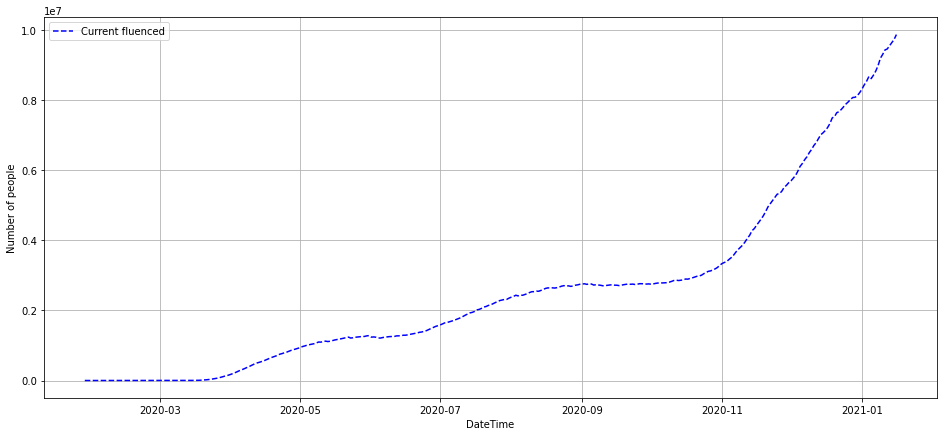

In [31]:
#Calculate this number
pandemic['Current']=pandemic['All']-pandemic['Cure']
#Paint the curve
plt.figure(figsize=(16, 7))
plt.plot(pandemic.iloc[:,0],pandemic.iloc[:,5],label='Current fluenced',linestyle='--',  c='b')
plt.xlabel('DateTime')
plt.ylabel('Number of people')
plt.grid()
plt.legend()
plt.show()

Now let's take a look at the oil

In [32]:
oil.dtypes

Date        object
Close      float64
Open       float64
High       float64
Low        float64
Volume      object
Up/Down     object
dtype: object

Likewise, Date should be in datetime type

In [33]:
#Change into type datetime in the format yyyy-mm-dd 
oil.iloc[:,0] = pd.to_datetime(oil.iloc[:,0],format='%Y-%m-%d')
print(oil)

           Date  Close   Open   High    Low   Volume Up/Down
0    2020-12-31  48.52  48.35  48.58  47.77  181.89K   0.25%
1    2020-12-30  48.40  48.13  48.66  47.61  266.96K   0.83%
2    2020-12-29  48.00  47.72  48.35  47.68  213.78K   0.80%
3    2020-12-28  47.62  48.23  48.96  47.50  238.46K  -1.26%
4    2020-12-24  48.23  48.09  48.62  47.56  167.39K   0.23%
...         ...    ...    ...    ...    ...      ...     ...
1050 2017-01-06  53.99  53.73  54.32  53.32  528.33K   0.43%
1051 2017-01-05  53.76  53.39  54.12  52.79  517.36K   0.94%
1052 2017-01-04  53.26  52.49  53.43  52.15  512.64K   1.78%
1053 2017-01-03  52.33  54.20  55.24  52.11  727.79K  -3.15%
1054 2017-01-02  54.03  54.09  54.18  54.01        -   0.58%

[1055 rows x 7 columns]


Sort in time sequence

In [39]:
oil.sort_values('Date',ascending=True)

,Date,Close,Open,High,Low,Volume,Up/Down
1054,2017-01-02,54.03,54.09,54.18,54.01,-,0.58%
1053,2017-01-03,52.33,54.20,55.24,52.11,727.79K,-3.15%
1052,2017-01-04,53.26,52.49,53.43,52.15,512.64K,1.78%
1051,2017-01-05,53.76,53.39,54.12,52.79,517.36K,0.94%
1050,2017-01-06,53.99,53.73,54.32,53.32,528.33K,0.43%
...,...,...,...,...,...,...,...
4,2020-12-24,48.23,48.09,48.62,47.56,167.39K,0.23%
3,2020-12-28,47.62,48.23,48.96,47.50,238.46K,-1.26%
2,2020-12-29,48.00,47.72,48.35,47.68,213.78K,0.80%
1,2020-12-30,48.40,48.13,48.66,47.61,266.96K,0.83%


Check the curve of closing oil price

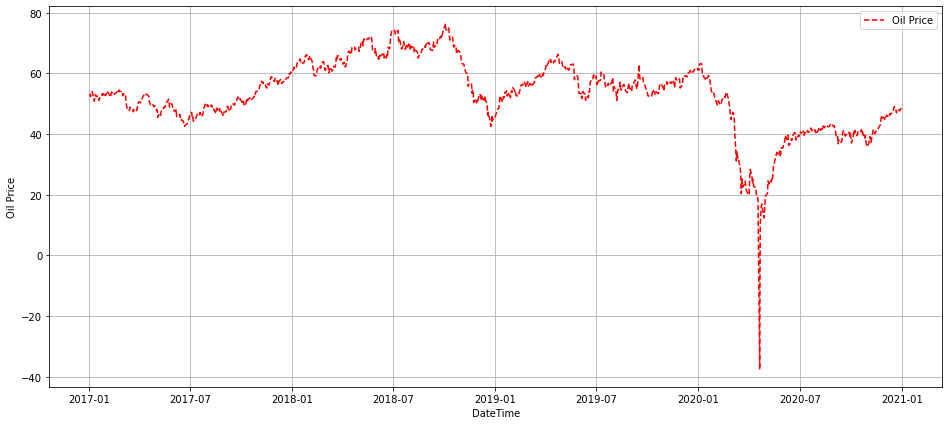

In [40]:
plt.figure(figsize=(16, 7))
plt.plot(oil.iloc[:,0],oil.iloc[:,1],label='Oil Price',linestyle='--',  c='r')
plt.xlabel('DateTime')
plt.ylabel('Oil Price')
plt.grid()
plt.legend()
plt.show()

It is reasonable to see the oil price to be negative, but it is still too extreme and need to be treated as outlier data

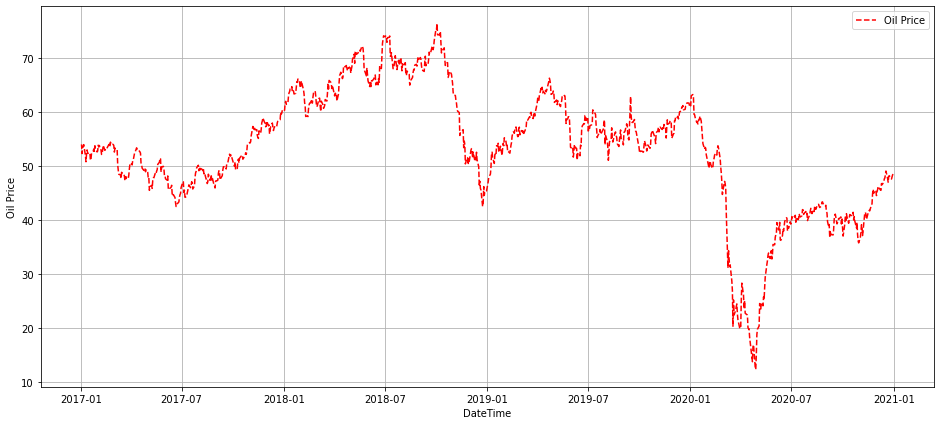

In [41]:
#Outlier elimination
oil_filtered = oil.loc[oil['Low']>0] #if minimum price is above 0, then so are other prices
plt.figure(figsize=(16, 7))
plt.plot(oil_filtered.iloc[:,0],oil_filtered.iloc[:,1],label='Oil Price',linestyle='--',  c='r')
plt.xlabel('DateTime')
plt.ylabel('Oil Price')
plt.legend()
plt.grid()
plt.show()

Finally, the RPM, this time we use bar chart

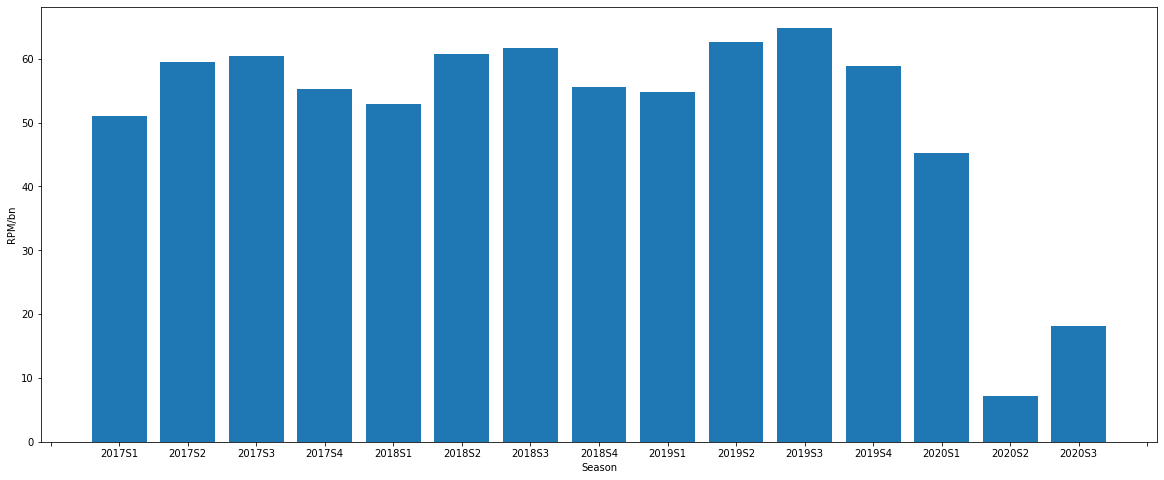

In [42]:
from matplotlib.pyplot import MultipleLocator

labels = rpm.iloc[:,0]
values = rpm.iloc[:,1]

plt.figure(figsize=(20, 8))
ax=plt.gca()
ax.xaxis.set_major_locator(MultipleLocator())
plt.xlabel('Season')
plt.ylabel('RPM/bn')
bars = plt.bar(labels, values)
plt.show()

In [44]:
#Store into csv.files
oil_filtered.to_csv('Oil_processed.csv', index=False, header=True)
pandemic.to_csv('pandemic_processed.csv', index=False, header=True)